# **Ciência de Dados na Prática**

### **Classificação de dígitos**

Professor: Eduardo Rocha

### <font color="red">1°  Definindo um problema de classificação multiclasse (mais de $2$ classes)</font>

Faremos previsões de dígitos escritos à mão no **Dataset** mnist. Esse é um exemplo de <font color="blue">classificação multiclasse</font>, pois nosso modelo terá que prever uma entre $10$ saídas possíveis para cada registro (dígitos de $0$ a $9$). 

Os Dados estão no scikit learn: [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

### <font color="red">2°  Carregando e explorando o Dataset</font>

In [1]:
# Importando os pacotes

import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')



In [2]:
# Carregamos o Dataset
digitos = datasets.load_digits()

In [3]:
digitos.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digitos.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digitos.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

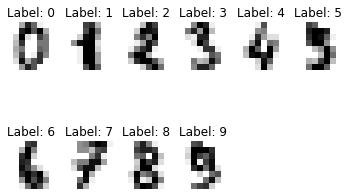

In [6]:
# Vizualizando algumas imagens e labels

images_e_labels = list(zip(digitos.images, digitos.target))
for index, (image, label) in enumerate(images_e_labels[:10]):
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)
    


In [7]:
# Gera x e y

x = digitos.data
y = digitos.target


In [8]:
# Formato de x e y
# Cada uma das linhas representa os pixeis de 1 dígito
print(x.shape, y.shape)


(1797, 64) (1797,)


### <font color="red">3°  Pré-processamento e normalização</font>

In [9]:
# Divisão em Dados de treino e de teste

x_treino, testeData, y_treino, testeLabels = train_test_split(x, y, test_size=0.30, random_state=101)

<font color="red">OBS</font>: Vamos fazer validações durante o treinamento, pois se o treinamento durasse $5$ horas, a gente já verifica a performance do modelo nesse período, e não somente depois das $5$ horas ... A gente está ganhando tempo...   

In [10]:
# Divisão dos Dados de treino em Dados de treino e Dados de validação

treinoData, validData, treinolabels, validLabels = train_test_split(x_treino, y_treino, test_size=0.1, random_state=84)


In [11]:
# Imprimindo o número de exemplos (observações) em cada Dataset

print("Exemplo de treino: {}".format(len(treinolabels)))
print("Exemplo de validação: {}".format(len(validLabels)))
print("Exemplo de teste: {}".format(len(testeLabels)))



Exemplo de treino: 1131
Exemplo de validação: 126
Exemplo de teste: 540


In [12]:
# Normalização dos Dados pela média (não é a única forma de fazer (Essa é uma proposta somente)
# Cálculo da média do Dataset de treino - calcular a média dos valores de entrada x
# Nesse caso vamos normaliizar somente as variáveis de entrada x. 
# Existem casos nos quais se faz necessário normalizar o Target "y"

x_norm = np.mean(x, axis = 0)


# Normalização dos Dados de treino e de teste
x_treino_norm = treinoData - x_norm
x_valid_norm = validData - x_norm
x_teste_norm = testeData - x_norm


# ELE FEZ UMA NORMALIZAÇÃO MUITO SIMPLES !!!


# NOTA: Aqui o algoritmo KNN precisa que os Dados dejam normalizados  

In [13]:
# Shape dos Dataset
print(x_treino_norm.shape, x_valid_norm.shape, x_teste_norm.shape)


(1131, 64) (126, 64) (540, 64)


### <font color="red">4°  Construíndo a máquina preditiva</font>

Testando o melhor valor de K - Etapa de validação em treinamento

In [14]:
# Range de valores de k que iremos testar
# Usar valores ímpares para evitar empate na votação do valor de k

kVals = range(1, 30, 2)


In [15]:
# Lista vazia para receber as acurácias 

acuracias = []

In [16]:
# Loop em todos os valores de K para testar cada um deles

for k in kVals:
    
    # Treinando o modelo KNN com cada valor de K
    modeloKNN = KNeighborsClassifier(n_neighbors=k)
    modeloKNN.fit(treinoData, treinolabels)
    
    
    
    # Validação - Avaliando o modelo e atualizando a lista de acurácias durante o treinamento
    score = modeloKNN.score(validData, validLabels)
    print("Com valor k = %d, a acurácia é = %0.2f%%" % (k, score*100))
    
    
    
    acuracias.append(score)



Com valor k = 1, a acurácia é = 99.21%
Com valor k = 3, a acurácia é = 100.00%
Com valor k = 5, a acurácia é = 100.00%
Com valor k = 7, a acurácia é = 99.21%
Com valor k = 9, a acurácia é = 98.41%
Com valor k = 11, a acurácia é = 98.41%
Com valor k = 13, a acurácia é = 97.62%
Com valor k = 15, a acurácia é = 97.62%
Com valor k = 17, a acurácia é = 97.62%
Com valor k = 19, a acurácia é = 97.62%
Com valor k = 21, a acurácia é = 97.62%
Com valor k = 23, a acurácia é = 97.62%
Com valor k = 25, a acurácia é = 96.83%
Com valor k = 27, a acurácia é = 96.83%
Com valor k = 29, a acurácia é = 96.83%


In [17]:
# Por meio da validação em treinamento, posso nítidamente interromper o
# treinamento a partir de k=9, pois está só diminuindo a acurácia

# Obtendo o valor de k que apresentou a maior acurácia 
i = np.argmax(acuracias)
print("O valor de k = %d alcançou a mais alta acurácia do %0.2f%% nos Dados de validação!" % (kVals[i], acuracias[i]*100))


O valor de k = 3 alcançou a mais alta acurácia do 100.00% nos Dados de validação!


##### Construção e treinamento da máquina com <font color="blue">KNN</font>

In [18]:
# Criando a versão final do modelo com o maior valor de k
# Poderia colocar o valor de k=3 diretamente. Mas para deixar mais automatizado, colocamos o valor "i"

modelofinal = KNeighborsClassifier(n_neighbors = kVals[i])


In [19]:
# Treinamento do modelo
modelofinal.fit(treinoData, treinolabels)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

<font color="red">OBS</font>: Lembre-se que você pode alterar os hyperparâmetros do modelo. Experimente alterar o "<font color="blue">metric = 'euclidean'</font>".

Revisar: [link da internet](http://www.sakurai.dev.br/classificacao-usando-knn/)


### <font color="red">5°  Avaliação da máquina preditiva - previsões com Dados de teste</font>

In [20]:
# Previsões com dados de teste

predictions = modelofinal.predict(testeData)


In [21]:
# Performande do modelo nos Dados de teste

print("\033[0;34m Avaliação do modelo nos Dados de teste")
print("")
print(classification_report(testeLabels, predictions))

# NOTA:
# Neste análise observamos apenas no "f1-score" para poder avaliar o
# performance de nosso modelo


 Avaliação do modelo nos Dados de teste

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        49
           3       0.98      1.00      0.99        54
           4       1.00      0.98      0.99        61
           5       0.98      1.00      0.99        59
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        56
           8       1.00      0.95      0.97        59
           9       0.98      1.00      0.99        48

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [22]:
# Confusion Matrix do modelo final

print("\033[0;35m Confusion Matrix")
print("")
print("")
print(confusion_matrix(testeLabels, predictions))

# INTERPRETAÇÃO
# A nossa matrix tem essa ordem nas filas e colunas (de "0" a "9")
# Fora da diagonal principal são os erros de nosso modelo
# Na diagonal principal estão nossos acertos

#                          Gabarito (diígitos)
#                                |
#                                v                     
#                                0
#                                1
#                                2
#                                3
#                                4
#                                5
#                                6
#                                7
#                                8
#                                9
#   predict--> 0 1 2 3 4 5 6 7 8 9
#   (dígitos)

# Quando meu dígito é zero, meu algoritmo preveu que o dígito também é zero (53 vezes)

# Quando meu dígito é 1, meu algoritmo preveu que o dígito é um 54 vezes, mas erro duas vezes (na vertical: "1" e "2")  

# 

 Confusion Matrix


[[53  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  1]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  1  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


Eu acredito que esse dígito seja: 0


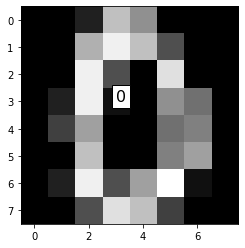

Eu acredito que esse dígito seja: 3


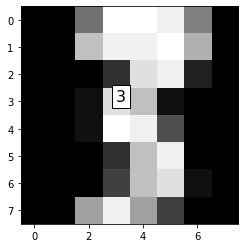

Eu acredito que esse dígito seja: 2


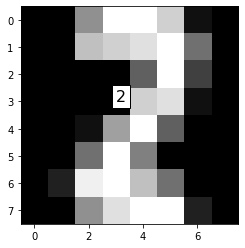

Eu acredito que esse dígito seja: 4


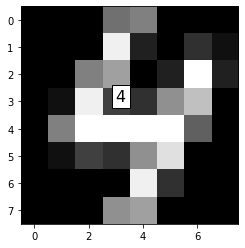

Eu acredito que esse dígito seja: 2


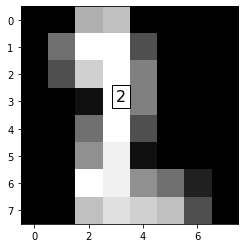

In [28]:
# Fazendo previsões com o modelo treinado usando dados de teste
# Para isso, vou buscar 5 valores randômicos de base de teste para fazer novas previsões 


for i in np.random.randint(0, high=len(testeLabels), size=(5,)):
    
    
    # obtém uma imagem e faz a previsão
    image = testeData[i]
    prediction = modelofinal.predict([image])[0]
    
    
    # Mostra a previsões
    imgdata = np.array(image, dtype = 'float')
    pixels = imgdata.reshape((8, 8))
    plt.imshow(pixels, cmap='gray')
    plt.annotate(prediction, (3, 3), bbox={'facecolor':'white'}, fontsize=16)
    print("Eu acredito que esse dígito seja: {}".format(prediction))
    plt.show()




### <font color="red">6°  Previsões em novos Dados com o Modelo Treinado</font>

Só para lembrar: **nosso modelo foi criado para prever dígitos**. Logo, não serve para prever valor de casas, nem fraude de cartão de crédito, ...cada modelo com seu propósito, ok?

In [29]:
# Definindo um novo dígito (Dados de entrada)
# Preciso entregar para o modelo um DÍGITO. Ele é um conjunto de 64 pixels (lembra?)

novoDigito = [0., 0., 0., 8., 15., 1., 0., 0., 0., 0., 0., 12., 14.,
              0., 0., 0., 0., 0., 3., 16., 7., 0., 0., 0., 0., 0.,
              6., 16., 2., 0., 0., 0., 0., 0., 7., 16., 16., 13., 5.,
              0., 0., 0., 15., 16., 9., 9., 14., 0., 0., 0., 3., 14.,
              9., 2., 16., 2., 0., 0., 0., 7., 15., 16., 11., 0.]




In [31]:
# Normalizando o novo dígito - precisa fazer esse pre-processamento pois
# o modelo aprendeu com Dados normalizados... ok?

novoDigito_norm = novoDigito - x_norm


In [32]:
# Fazendo a previsão com o modelo treinado

novaPrevisao = modelofinal.predict([novoDigito_norm])


Eu acredito que esse dígito seja: [6]


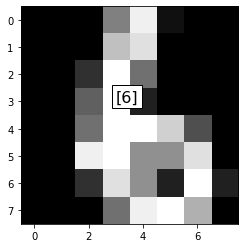

In [33]:
# Previsão do modelo

imgdata = np.array(novoDigito, dtype = 'float')
pixels = imgdata.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.annotate(novaPrevisao, (3, 3), bbox={'facecolor':'white'}, fontsize=16)
print("Eu acredito que esse dígito seja: {}".format(novaPrevisao))
plt.show()



**Fazemos outra previsão**

In [34]:
# Definindo um novo dígito (Dados de entrada)

novoDigito = [0., 0., 0., 1., 11., 9., 0., 0., 0., 0., 0., 7., 16.,
              13., 0., 0., 0., 0., 4., 14., 16., 9., 0., 0., 0., 10.,
              16., 11., 16., 8., 0., 0., 0., 0., 0., 3., 16., 6., 0.,
              0., 0., 0., 0., 3., 16., 8., 0., 0., 0., 0., 0., 5.,
              16., 10., 0., 0., 0., 0., 0., 2., 14., 6., 0., 0.]


In [35]:
# Normalizando o novo dígito

novoDigito_norm = novoDigito - x_norm


In [36]:
# Fazendo a previsão com o modelo treinado

novaPrevisao = modelofinal.predict([novoDigito_norm])


Eu acredito que esse dígito seja: [1]


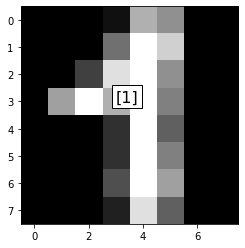

In [38]:
# Previsão do modelo

imgdata = np.array(novoDigito, dtype = 'float')
pixels = imgdata.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.annotate(novaPrevisao, (3, 3), bbox={'facecolor':'white'}, fontsize=16)
print("Eu acredito que esse dígito seja: {}".format(novaPrevisao))
plt.show()

